In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt


In [2]:
# Define dataset paths
train_dir = r'D:\AI Algorithm\cucumber\train'
val_dir = r'D:\AI Algorithm\cucumber\validation'
test_dir = r'D:\AI Algorithm\cucumber\test'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=1, class_mode='binary', shuffle=False)


Found 690 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [3]:
# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)


C:\Users\Anurag\cnn_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8421 - loss: 0.3560 - val_accuracy: 0.9696 - val_loss: 0.0849
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9514 - loss: 0.1342 - val_accuracy: 0.9739 - val_loss: 0.0931
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9649 - loss: 0.0939 - val_accuracy: 0.9652 - val_loss: 0.0724
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9780 - loss: 0.0492 - val_accuracy: 0.9696 - val_loss: 0.0680
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9932 - loss: 0.0395 - val_accuracy: 0.9696 - val_loss: 0.0724
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.9867 - loss: 0.0286 - val_accuracy: 0.9783 - val_loss: 0.0583
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.9890 - loss: 0.0396 - val_accuracy: 0.9783 - val_loss: 0.0546
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.9956 - loss: 0.0215 - val_accuracy: 0.9739 - val_loss:

In [5]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    verbose=1
)

# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.7602 - loss: 0.6031 - val_accuracy: 0.9826 - val_loss: 0.0500
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.9076 - loss: 0.2576 - val_accuracy: 0.9783 - val_loss: 0.0631
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.9628 - loss: 0.1514 - val_accuracy: 0.9739 - val_loss: 0.0728
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.9847 - loss: 0.1172 - val_accuracy: 0.9652 - val_loss: 0.0857
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.9922 - loss: 0.0782 - val_accuracy: 0.9696 - val_loss: 0.0888
232/232 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9530 - loss: 0.1142
Test Accuracy: 0.96


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Assuming `y_true`, `y_pred`, and `y_pred_probs` are already defined

# Calculate metrics
accuracy = (y_true == y_pred).mean()
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
auc = roc_auc_score(y_true, y_pred_probs)
conf_matrix = confusion_matrix(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mape = 100 * np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + 1e-10)))
smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-10))
explained_var = explained_variance_score(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mbd = np.mean(y_pred - y_true)

# Print metrics in the desired format
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("Confusion Matrix:")
print(f" {conf_matrix}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.2f}%")
print(f"Explained Variance Score: {explained_var:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Bias Deviation (MBD): {mbd:.2f}")

NameError: name 'y_true' is not defined

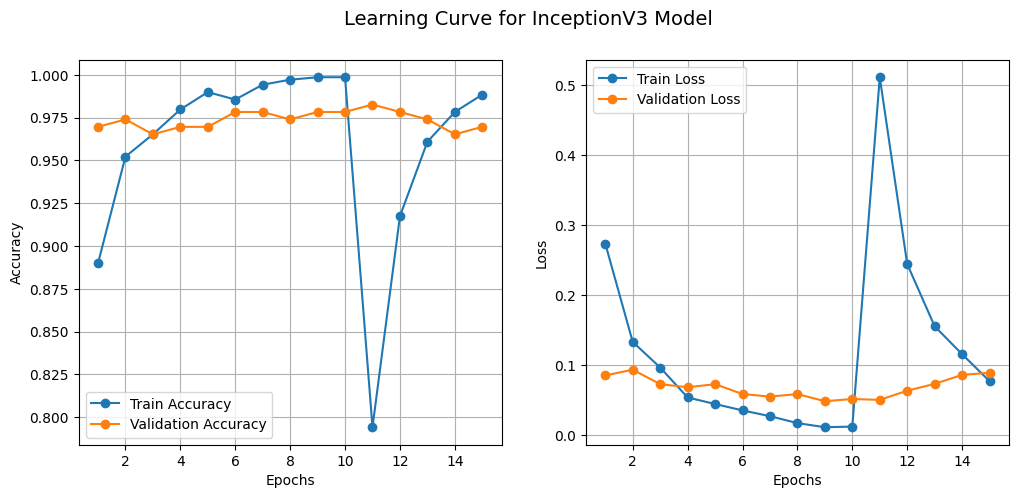

In [7]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from training history
train_acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
train_loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Learning Curve for InceptionV3 Model', fontsize=14)

# Plot accuracy vs. epochs
axes[0].plot(epochs, train_acc, label='Train Accuracy', marker='o')
axes[0].plot(epochs, val_acc, label='Validation Accuracy', marker='o')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid()

# Plot loss vs. epochs
axes[1].plot(epochs, train_loss, label='Train Loss', marker='o')
axes[1].plot(epochs, val_loss, label='Validation Loss', marker='o')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

plt.show()
